In [2]:
import os
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import scipy as st
import seaborn as sns

In [3]:
df_hpi = pd.read_csv("HPI_master.csv")
df_hpi.head(3)

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,100.00
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,101.03,101.11
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.40,101.08


In [4]:
df_hpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99325 entries, 0 to 99324
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hpi_type    99325 non-null  object 
 1   hpi_flavor  99325 non-null  object 
 2   frequency   99325 non-null  object 
 3   level       99325 non-null  object 
 4   place_name  99325 non-null  object 
 5   place_id    99325 non-null  object 
 6   yr          99325 non-null  int64  
 7   period      99325 non-null  int64  
 8   index_nsa   99323 non-null  float64
 9   index_sa    32134 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 7.6+ MB


In [5]:
#re_arrange the and select variables variables
df_hpi=df_hpi[["hpi_type","hpi_flavor","frequency","level","index_sa","index_nsa"]]

In [6]:
df_hpi.head(1)

,hpi_type,hpi_flavor,frequency,level,index_sa,index_nsa
0,traditional,purchase-only,monthly,USA or Census Division,100.0,100.0


In [7]:
df_hpi.dropna(inplace =True)

In [8]:
df_hpi.isnull().sum() # missing values are taken care of

hpi_type      0
hpi_flavor    0
frequency     0
level         0
index_sa      0
index_nsa     0
dtype: int64

In [9]:
df_hpi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32134 entries, 0 to 99324
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hpi_type    32134 non-null  object 
 1   hpi_flavor  32134 non-null  object 
 2   frequency   32134 non-null  object 
 3   level       32134 non-null  object 
 4   index_sa    32134 non-null  float64
 5   index_nsa   32134 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.7+ MB


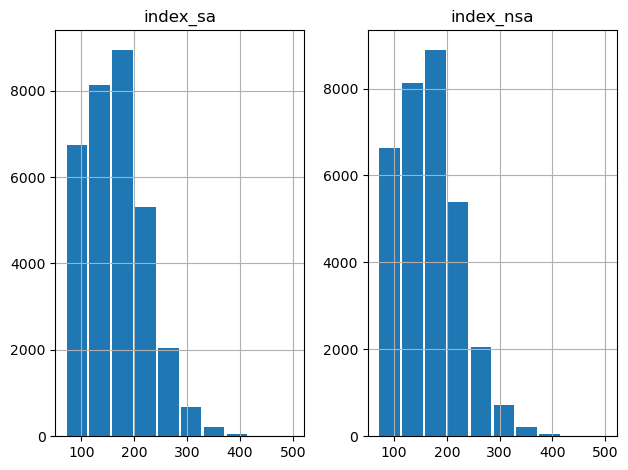

In [10]:
#lets plot the continous variables  
df_hpi.hist(rwidth =0.9)
plt.tight_layout()

In [11]:
#visualise the continous features vs index_nsa

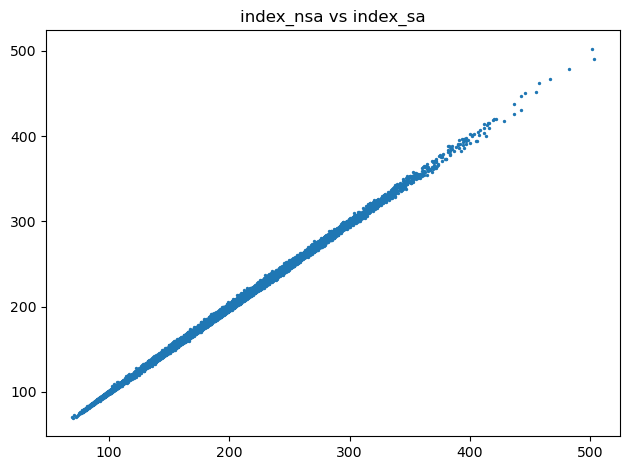

In [12]:
plt.scatter(df_hpi["index_nsa"],df_hpi["index_sa"],s=2)
plt.title("index_nsa vs index_sa")
plt.tight_layout()
plt.show()

In [13]:
#plot the categorical variables vs index_nsa
df_hpi["hpi_type"] = df_hpi["hpi_type"].astype('category')
df_hpi["hpi_flavor"] = df_hpi["hpi_flavor"].astype('category')
df_hpi["frequency"] = df_hpi["frequency"].astype('category')
df_hpi["level"] = df_hpi['level'].astype('category')

df_hpi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32134 entries, 0 to 99324
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   hpi_type    32134 non-null  category
 1   hpi_flavor  32134 non-null  category
 2   frequency   32134 non-null  category
 3   level       32134 non-null  category
 4   index_sa    32134 non-null  float64 
 5   index_nsa   32134 non-null  float64 
dtypes: category(4), float64(2)
memory usage: 879.2 KB


In [14]:
#create list of unique hpi_type values
cat_list=df_hpi["hpi_type"].unique()
#create average index_nsa per hpi_type using groupby
cat_average =df_hpi.groupby("hpi_type")["index_nsa"].mean()

/var/folders/gp/c0qhc5111qnf4x_rmyt962br0000gn/T/ipykernel_25209/387089031.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_average =df_hpi.groupby("hpi_type")["index_nsa"].mean()


In [15]:
cat_average

hpi_type
developmental    162.855465
distress-free    178.795735
traditional      167.439215
Name: index_nsa, dtype: float64

<BarContainer object of 3 artists>

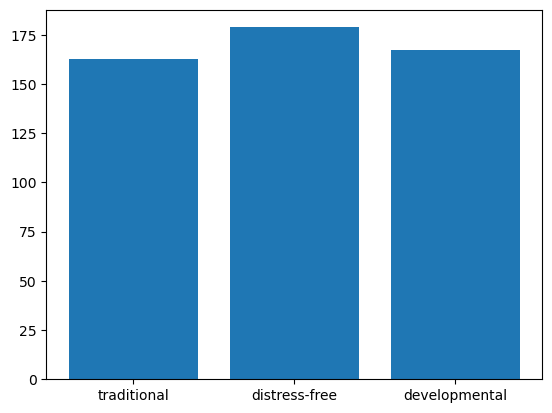

In [16]:
plt.bar(cat_list,cat_average)

/var/folders/gp/c0qhc5111qnf4x_rmyt962br0000gn/T/ipykernel_25209/3597879753.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_average=df_hpi.groupby("hpi_type")["index_nsa"].mean()


<BarContainer object of 3 artists>

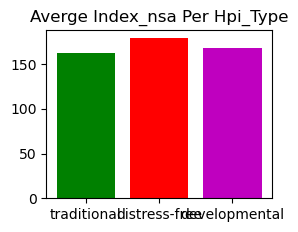

In [17]:
#create a 2x2 subplot
plt.subplot(2,2,1)

plt.title("Averge Index_nsa Per Hpi_Type")
cat_list = df_hpi["hpi_type"].unique()
#create an image
cat_average=df_hpi.groupby("hpi_type")["index_nsa"].mean()
colors = ["g","r","m"]
plt.bar(cat_list,cat_average,color =colors)



/var/folders/gp/c0qhc5111qnf4x_rmyt962br0000gn/T/ipykernel_25209/2019485177.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_average =df_hpi.groupby("hpi_flavor")["index_nsa"].mean()


<BarContainer object of 2 artists>

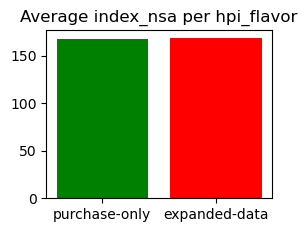

In [18]:
plt.subplot(2,2,2)
plt.title("Average index_nsa per hpi_flavor")
cat_list = df_hpi["hpi_flavor"].unique()
cat_average =df_hpi.groupby("hpi_flavor")["index_nsa"].mean()
plt.bar(cat_list,cat_average, color = colors)


/var/folders/gp/c0qhc5111qnf4x_rmyt962br0000gn/T/ipykernel_25209/1268040384.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_average =df_hpi.groupby("frequency")["index_nsa"].mean()


<BarContainer object of 2 artists>

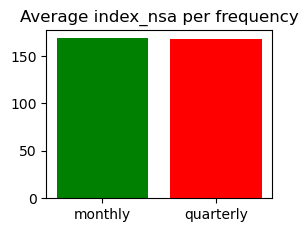

In [19]:
plt.subplot(2,2,3)
plt.title("Average index_nsa per frequency")
cat_list =df_hpi["frequency"].unique()
cat_average =df_hpi.groupby("frequency")["index_nsa"].mean()
plt.bar(cat_list,cat_average,color =colors)


/var/folders/gp/c0qhc5111qnf4x_rmyt962br0000gn/T/ipykernel_25209/718831323.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_average =df_hpi.groupby("level")["index_nsa"].mean()


<BarContainer object of 4 artists>

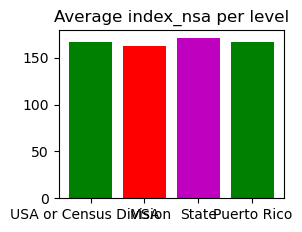

In [20]:
plt.subplot(2,2,4)
plt.title("Average index_nsa per level")
cat_list =df_hpi["level"].unique()
cat_average =df_hpi.groupby("level")["index_nsa"].mean()
plt.bar(cat_list,cat_average,color =colors)


In [21]:
#Split the Data into Training and Testing 
X=df_hpi.iloc[:,:-1] #Independent variables
Y=df_hpi.iloc[:,-1]# dependent variables
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [22]:
df_hpi.head(1)

,hpi_type,hpi_flavor,frequency,level,index_sa,index_nsa
0,traditional,purchase-only,monthly,USA or Census Division,100.0,100.0


In [23]:
# Turn the categories into numbers


categorical_cols =["hpi_type","hpi_flavor","frequency","level"]
#use get_dummies 
df_dummies = pd.get_dummies(df_hpi, columns=categorical_cols)
df_dummies


,index_sa,index_nsa,hpi_type_developmental,hpi_type_distress-free,hpi_type_traditional,hpi_flavor_expanded-data,hpi_flavor_purchase-only,frequency_monthly,frequency_quarterly,level_MSA,level_Puerto Rico,level_State,level_USA or Census Division
0,100.00,100.00,False,False,True,False,True,True,False,False,False,False,True
1,101.11,101.03,False,False,True,False,True,True,False,False,False,False,True
2,101.08,101.40,False,False,True,False,True,True,False,False,False,False,True
3,101.10,101.79,False,False,True,False,True,True,False,False,False,False,True
4,101.50,102.44,False,False,True,False,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99320,158.62,160.23,True,False,False,False,True,False,True,False,True,False,False
99321,161.27,159.54,True,False,False,False,True,False,True,False,True,False,False
99322,152.81,155.14,True,False,False,False,True,False,True,False,True,False,False
99323,154.71,150.61,True,False,False,False,True,False,True,False,True,False,False


In [24]:

columns_to_convert = df_dummies.columns[2:]  # This selects all columns starting from the third column

# Convert these columns to integers
df_dummies[columns_to_convert] = df_dummies[columns_to_convert].apply(lambda x: x.astype(int))

In [25]:
df_dummies.head(2)


,index_sa,index_nsa,hpi_type_developmental,hpi_type_distress-free,hpi_type_traditional,hpi_flavor_expanded-data,hpi_flavor_purchase-only,frequency_monthly,frequency_quarterly,level_MSA,level_Puerto Rico,level_State,level_USA or Census Division
0,100.00,100.00,0,0,1,0,1,1,0,0,0,0,1
1,101.11,101.03,0,0,1,0,1,1,0,0,0,0,1


In [26]:
#the average hpi_nsa varies depends on the hpi_type,hpi_flavor,frequenc and level
#features dropped yr, period,place name and place id
Y = df_dummies["index_nsa"]
X= df_dummies.drop(["index_nsa"],axis = 1)

In [27]:
#Spliting the data into Train and Test

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size =0.2, random_state =0)

In [41]:
X_test.shape,Y_test.shape

((6427, 12), (6427,))

In [29]:
#create regressor
reg = LinearRegression()

In [30]:
reg


LinearRegression()

In [31]:
#Train or Fit the training data (calculate the coeficients)
reg.fit(X_train,Y_train)

LinearRegression()

In [32]:
r2_train=reg.score(X_train,Y_train)
r2_train

0.9992167488098224

In [33]:
r2_test=reg.score(X_test,Y_test)
r2_test

0.9992298022293251

In [34]:
Y_predict = reg.predict(X_test)
Y_predict

array([130.79410014, 116.86368453, 112.5039875 , ..., 158.66869517,
       202.66713106, 285.23500727])

In [35]:
coefficients = reg.coef_
coefficients

array([ 1.00495124, -0.43005927,  0.18064873,  0.24941054,  0.05072811,
       -0.05072811,  0.18830367, -0.18830367,  0.12883313, -0.43005927,
        0.15719029,  0.14403585])

In [36]:
intercept = reg.intercept_
intercept

-0.3816655205704933

In [37]:

from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(Y_test,Y_predict))
rmse

1.5350265977267492